In [21]:
#импорт библиотек
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки

> Некоторый банк обратился к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов. Для этого он хочет прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время.

In [22]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Проверка данныз на анличие пропусков
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
# Удаление номера строки, есть ID клиента
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [25]:
# Проверка на наличие дубликатов
churn_data[churn_data.duplicated()].sum()

CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            0.0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    0.0
Exited               0
dtype: object

Целевой признак - Exited

RowNumber — номер строки таблицы;\
CustomerId — идентификатор клиента;\
Surname — фамилия клиента;\
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);\
Geography — страна проживания клиента (банк межнациональный);\
Gender — пол клиента;\
Age — возраст клиента;\
Tenure — сколько лет клиент пользуется банком;\
Balance — сколько у клиента денег на счетах в банке;\
NumOfProduct — число услуг банка, которыми воспользовался клиент;\
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);\
IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);\
EstimatedSalary — предполагаемая заработная плата клиента;\
Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [26]:
print(churn_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


### Визуализация зависимостей

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Числовые признаки
numeric_cols = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 
                'NumOfProducts', 'EstimatedSalary']
# Категориальные признаки
cat_cols = ['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Целевая переменная
target = 'Exited'

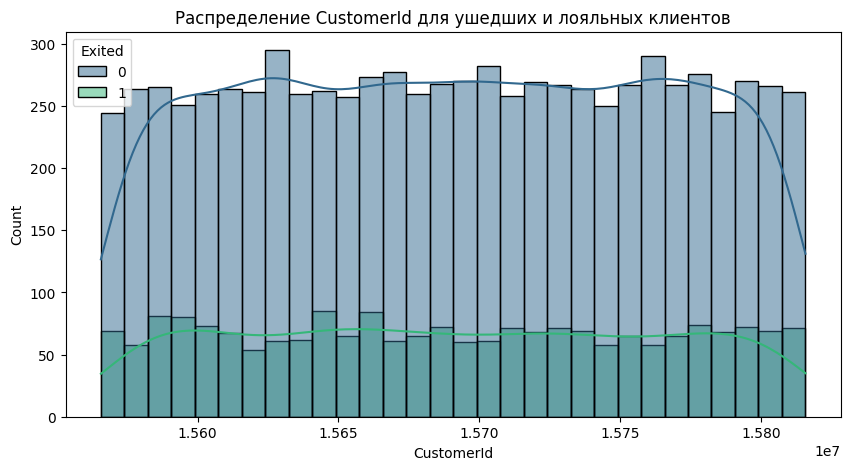

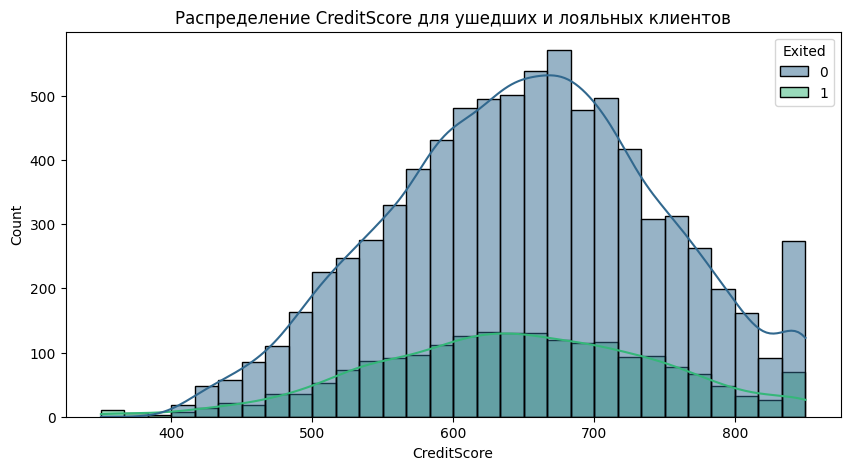

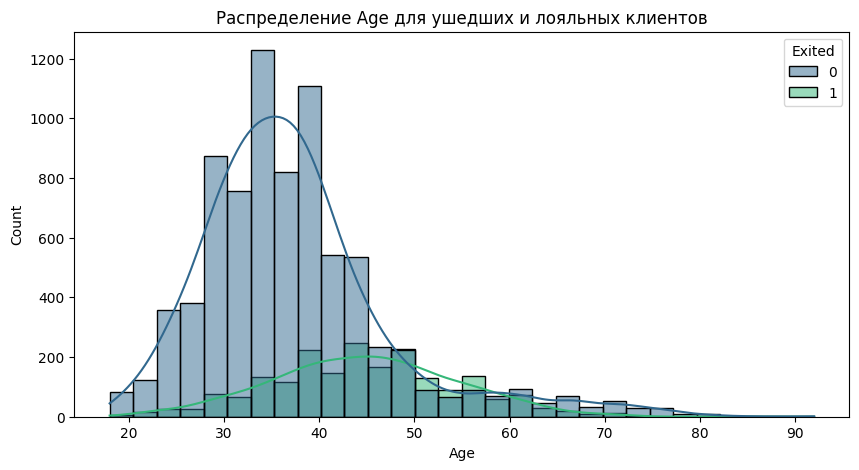

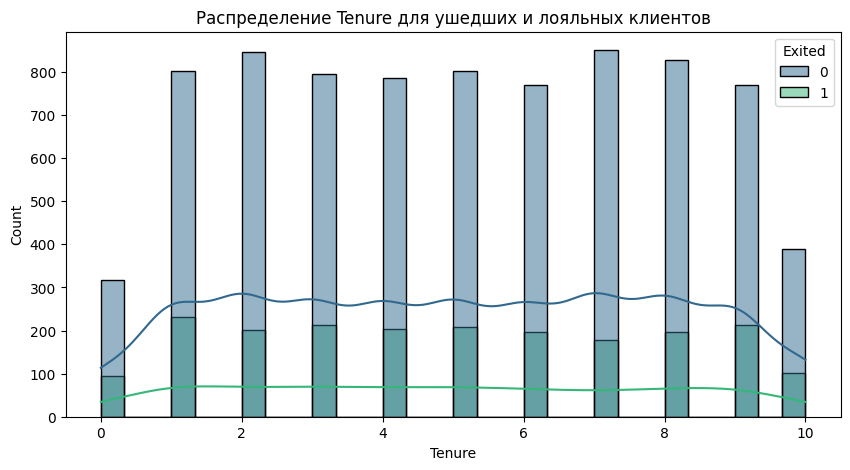

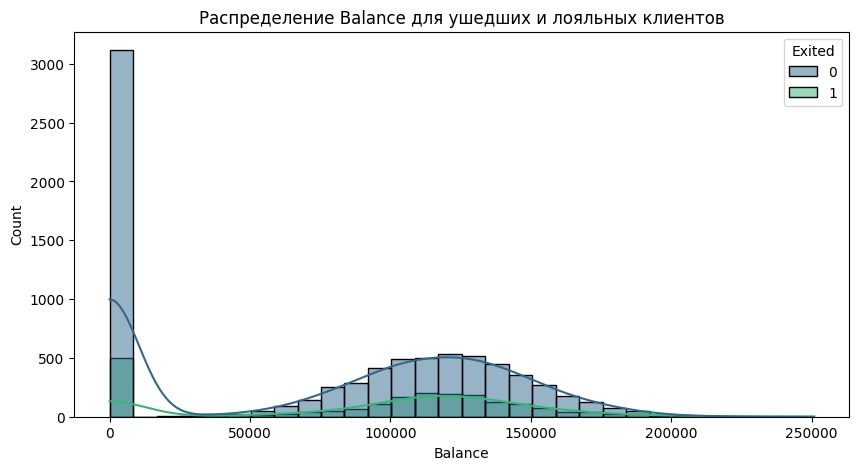

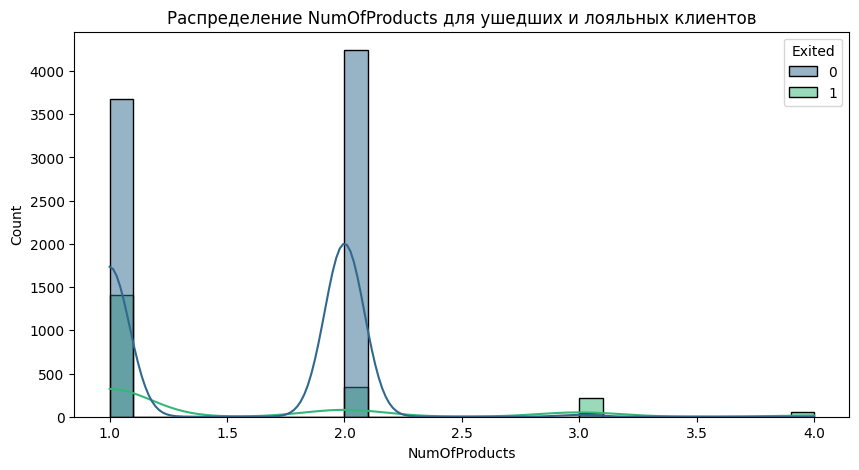

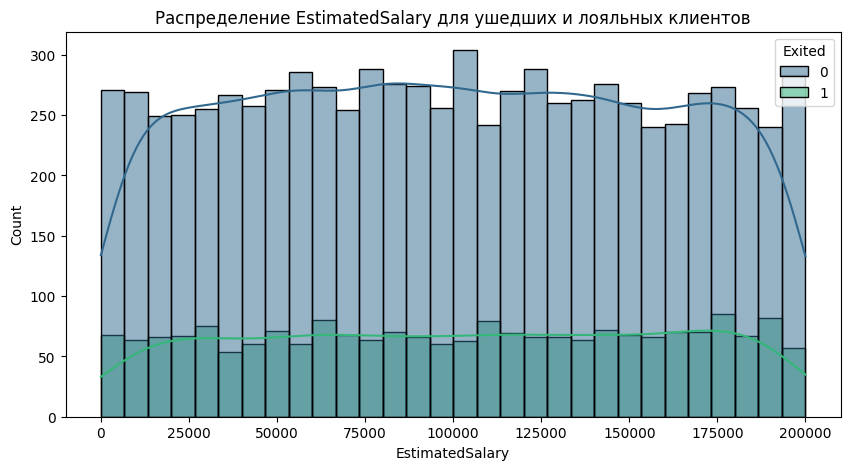

In [29]:
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=churn_data, x=col, hue='Exited', kde=True, bins=30, palette='viridis')
    plt.title(f'Распределение {col} для ушедших и лояльных клиентов')
    plt.show()